<a href="https://colab.research.google.com/github/orinbou/CalcDaytime/blob/main/sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

mercury.App

**Python の天文計算ライブラリ PyEphem を使用して日の出／入を計算します**

参考：[天文計算ライブラリ => PyEphem](https://rhodesmill.org/pyephem/)

参考：[国立天文台 => 横浜（神奈川）](https://eco.mtk.nao.ac.jp/koyomi/dni/2024/dni15.html)

# 計算結果

**以下のとおり計算しました。**

## 入力情報

位置情報： (緯度, 経度) = (35.4500, 139.6500)

🌎[地図で位置を確認する](https://www.google.com/maps?q=35.4500,139.6500)

## 概要情報

本日の情報： (日付, 日の出, 日の入, 日中長[時間]) = (2024-04-08, 05:18:05, 18:08:54, 12:50:48.395902)

### 日の出🌅

【最早】： (日付, 日の出, 日の入, 日中長[時間]) = (2024-06-13, 4.422937134444444, 18.962846245277778, 14.539909110833333)

【最遅】： (日付, 日の出, 日の入, 日中長[時間]) = (2024-01-08, 6.8461861794444445, 16.747240094722223, 9.901053915277776)

### 日の入🌇

【最早】： (日付, 日の出, 日の入, 日中長[時間]) = (2024-12-05, 6.587266166666667, 16.47752939777778, 9.890263231111112)

【最遅】： (日付, 日の出, 日の入, 日中長[時間]) = (2024-06-29, 4.479306798888889, 19.015874062222224, 14.536567263333332)

### 日中長🌞

【冬至】： (日付, 日の出, 日の入, 日中長[時間]) = (2024-12-21, 6.771982281111111, 16.54457454888889, 9.772592267777778)

【夏至】： (日付, 日の出, 日の入, 日中長[時間]) = (2024-06-21, 4.438199931111112, 19.00300006638889, 14.564800135277778)

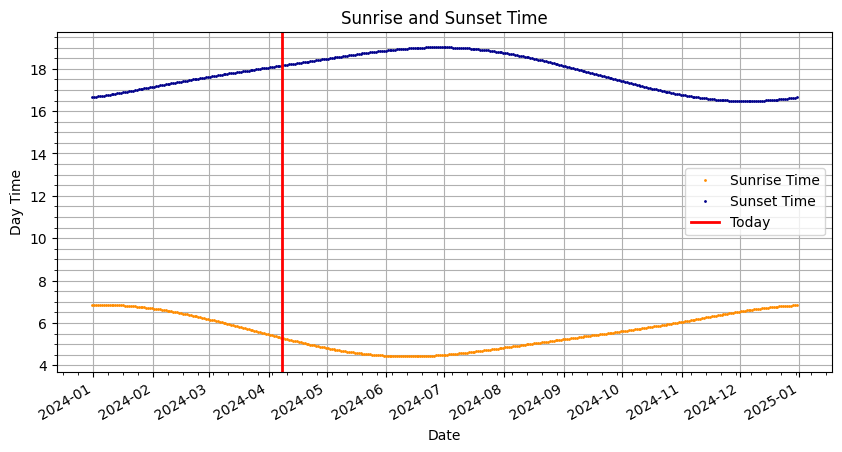

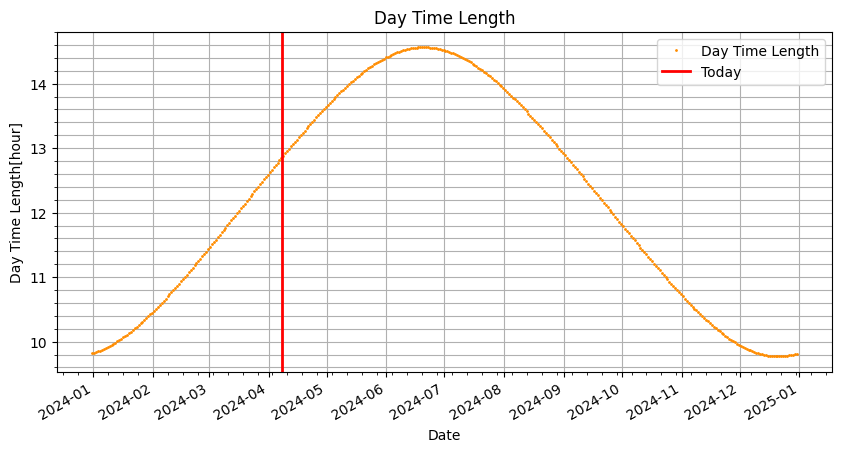

## 詳細情報

(日付, 日の出, 日の入, 日中長[時間]) = (2024-01-01, 06:50:03, 16:39:06, 9:49:03.248334)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-01-02, 06:50:15, 16:39:52, 9:49:37.037144)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-01-03, 06:50:25, 16:40:39, 9:50:13.932357)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-01-04, 06:50:33, 16:41:27, 9:50:53.902198)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-01-05, 06:50:39, 16:42:16, 9:51:36.912058)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-01-06, 06:50:43, 16:43:06, 9:52:22.924584)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-01-07, 06:50:45, 16:43:57, 9:53:11.869784)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-01-08, 06:50:46, 16:44:50, 9:54:03.794095)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-01-09, 06:50:44, 16:45:43, 9:54:58.562410)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-01-10, 06:50:41, 16:46:37, 9:55:56.156316)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-01-11, 06:50:35, 16:47:32, 9:56:56.525594)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-01-12, 06:50:28, 16:48:28, 9:57:59.618587)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-01-13, 06:50:19, 16:49:24, 9:59:05.382667)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-01-14, 06:50:07, 16:50:21, 10:00:13.764434)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-01-15, 06:49:54, 16:51:19, 10:01:24.709551)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-01-16, 06:49:39, 16:52:17, 10:02:38.162467)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-01-17, 06:49:22, 16:53:16, 10:03:54.066204)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-01-18, 06:49:03, 16:54:15, 10:05:12.362408)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-01-19, 06:48:42, 16:55:15, 10:06:32.991739)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-01-20, 06:48:19, 16:56:15, 10:07:55.894367)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-01-21, 06:47:55, 16:57:16, 10:09:21.010356)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-01-22, 06:47:28, 16:58:17, 10:10:48.280069)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-01-23, 06:47:00, 16:59:18, 10:12:17.644362)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-01-24, 06:46:30, 17:00:19, 10:13:49.044766)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-01-25, 06:45:58, 17:01:20, 10:15:22.423522)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-01-26, 06:45:24, 17:02:22, 10:16:57.723587)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-01-27, 06:44:49, 17:03:24, 10:18:34.888578)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-01-28, 06:44:12, 17:04:26, 10:20:13.862752)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-01-29, 06:43:33, 17:05:28, 10:21:54.590932)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-01-30, 06:42:53, 17:06:30, 10:23:37.018562)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-01-31, 06:42:11, 17:07:32, 10:25:21.091574)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-02-01, 06:41:27, 17:08:34, 10:27:06.756407)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-02-02, 06:40:42, 17:09:36, 10:28:53.959949)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-02-03, 06:39:55, 17:10:38, 10:30:42.649393)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-02-04, 06:39:07, 17:11:40, 10:32:32.772228)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-02-05, 06:38:17, 17:12:41, 10:34:24.275992)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-02-06, 06:37:26, 17:13:43, 10:36:17.108274)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-02-07, 06:36:33, 17:14:44, 10:38:11.216681)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-02-08, 06:35:39, 17:15:46, 10:40:06.549139)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-02-09, 06:34:44, 17:16:47, 10:42:03.054336)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-02-10, 06:33:47, 17:17:47, 10:44:00.682260)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-02-11, 06:32:49, 17:18:48, 10:45:59.384542)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-02-12, 06:31:49, 17:19:48, 10:47:59.114405)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-02-13, 06:30:49, 17:20:48, 10:49:59.826337)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-02-14, 06:29:47, 17:21:48, 10:52:01.475754)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-02-15, 06:28:43, 17:22:47, 10:54:04.018917)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-02-16, 06:27:39, 17:23:47, 10:56:07.413133)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-02-17, 06:26:34, 17:24:45, 10:58:11.617107)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-02-18, 06:25:27, 17:25:44, 11:00:16.591210)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-02-19, 06:24:19, 17:26:42, 11:02:22.297604)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-02-20, 06:23:11, 17:27:39, 11:04:28.700194)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-02-21, 06:22:01, 17:28:37, 11:06:35.764569)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-02-22, 06:20:50, 17:29:34, 11:08:43.457871)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-02-23, 06:19:39, 17:30:30, 11:10:51.748642)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-02-24, 06:18:26, 17:31:27, 11:13:00.606705)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-02-25, 06:17:13, 17:32:23, 11:15:10.003044)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-02-26, 06:15:58, 17:33:18, 11:17:19.909752)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-02-27, 06:14:43, 17:34:14, 11:19:30.299906)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-02-28, 06:13:28, 17:35:09, 11:21:41.147479)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-02-29, 06:12:11, 17:36:03, 11:23:52.427199)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-03-01, 06:10:54, 17:36:58, 11:26:04.114390)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-03-02, 06:09:36, 17:37:52, 11:28:16.184767)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-03-03, 06:08:17, 17:38:46, 11:30:28.614230)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-03-04, 06:06:58, 17:39:39, 11:32:41.378617)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-03-05, 06:05:38, 17:40:32, 11:34:54.453464)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-03-06, 06:04:18, 17:41:25, 11:37:07.813926)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-03-07, 06:02:57, 17:42:18, 11:39:21.434775)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-03-08, 06:01:35, 17:43:11, 11:41:35.290685)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-03-09, 06:00:13, 17:44:03, 11:43:49.356665)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-03-10, 05:58:51, 17:44:55, 11:46:03.608482)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-03-11, 05:57:28, 17:45:46, 11:48:18.022782)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-03-12, 05:56:05, 17:46:38, 11:50:32.576934)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-03-13, 05:54:42, 17:47:29, 11:52:47.248711)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-03-14, 05:53:18, 17:48:20, 11:55:02.016071)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-03-15, 05:51:54, 17:49:11, 11:57:16.857295)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-03-16, 05:50:30, 17:50:01, 11:59:31.751229)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-03-17, 05:49:05, 17:50:52, 12:01:46.677573)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-03-18, 05:47:40, 17:51:42, 12:04:01.617005)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-03-19, 05:46:15, 17:52:32, 12:06:16.551127)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-03-20, 05:44:50, 17:53:22, 12:08:31.462358)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-03-21, 05:43:25, 17:54:11, 12:10:46.333730)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-03-22, 05:42:00, 17:55:01, 12:13:01.148776)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-03-23, 05:40:34, 17:55:50, 12:15:15.891354)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-03-24, 05:39:09, 17:56:39, 12:17:30.545559)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-03-25, 05:37:43, 17:57:29, 12:19:45.095670)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-03-26, 05:36:18, 17:58:18, 12:21:59.526084)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-03-27, 05:34:53, 17:59:07, 12:24:13.821204)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-03-28, 05:33:28, 17:59:56, 12:26:27.965324)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-03-29, 05:32:02, 18:00:44, 12:28:41.942466)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-03-30, 05:30:38, 18:01:33, 12:30:55.736169)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-03-31, 05:29:13, 18:02:22, 12:33:09.329219)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-04-01, 05:27:48, 18:03:11, 12:35:22.703416)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-04-02, 05:26:24, 18:04:00, 12:37:35.839320)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-04-03, 05:25:00, 18:04:49, 12:39:48.716100)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-04-04, 05:23:36, 18:05:38, 12:42:01.311469)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-04-05, 05:22:13, 18:06:27, 12:44:13.601884)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-04-06, 05:20:50, 18:07:16, 12:46:25.562836)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-04-07, 05:19:27, 18:08:05, 12:48:37.169277)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-04-08, 05:18:05, 18:08:54, 12:50:48.395902)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-04-09, 05:16:44, 18:09:43, 12:52:59.217158)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-04-10, 05:15:22, 18:10:32, 12:55:09.607030)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-04-11, 05:14:02, 18:11:21, 12:57:19.538796)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-04-12, 05:12:41, 18:12:10, 12:59:28.985056)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-04-13, 05:11:22, 18:13:00, 13:01:37.917900)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-04-14, 05:10:03, 18:13:49, 13:03:46.309182)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-04-15, 05:08:44, 18:14:38, 13:05:54.130767)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-04-16, 05:07:26, 18:15:28, 13:08:01.354556)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-04-17, 05:06:09, 18:16:17, 13:10:07.952427)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-04-18, 05:04:53, 18:17:07, 13:12:13.896148)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-04-19, 05:03:37, 18:17:56, 13:14:19.157184)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-04-20, 05:02:22, 18:18:46, 13:16:23.706606)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-04-21, 05:01:08, 18:19:35, 13:18:27.515035)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-04-22, 04:59:54, 18:20:25, 13:20:30.552584)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-04-23, 04:58:42, 18:21:14, 13:22:32.788852)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-04-24, 04:57:30, 18:22:04, 13:24:34.192841)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-04-25, 04:56:19, 18:22:54, 13:26:34.732846)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-04-26, 04:55:09, 18:23:44, 13:28:34.376316)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-04-27, 04:54:00, 18:24:34, 13:30:33.089641)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-04-28, 04:52:53, 18:25:23, 13:32:30.837870)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-04-29, 04:51:46, 18:26:13, 13:34:27.584466)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-04-30, 04:50:40, 18:27:03, 13:36:23.291126)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-05-01, 04:49:35, 18:27:53, 13:38:17.917624)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-05-02, 04:48:31, 18:28:43, 13:40:11.421900)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-05-03, 04:47:29, 18:29:33, 13:42:03.760210)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-05-04, 04:46:28, 18:30:23, 13:43:54.887540)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-05-05, 04:45:28, 18:31:12, 13:45:44.757938)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-05-06, 04:44:29, 18:32:02, 13:47:33.324951)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-05-07, 04:43:31, 18:32:51, 13:49:20.541747)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-05-08, 04:42:35, 18:33:41, 13:51:06.361018)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-05-09, 04:41:39, 18:34:30, 13:52:50.734842)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-05-10, 04:40:46, 18:35:19, 13:54:33.614590)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-05-11, 04:39:53, 18:36:08, 13:56:14.951066)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-05-12, 04:39:02, 18:36:57, 13:57:54.694736)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-05-13, 04:38:12, 18:37:45, 13:59:32.796062)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-05-14, 04:37:24, 18:38:33, 14:01:09.205720)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-05-15, 04:36:37, 18:39:21, 14:02:43.874704)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-05-16, 04:35:51, 18:40:08, 14:04:16.754302)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-05-17, 04:35:07, 18:40:55, 14:05:47.796127)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-05-18, 04:34:25, 18:41:42, 14:07:16.952066)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-05-19, 04:33:44, 18:42:28, 14:08:44.174343)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-05-20, 04:33:04, 18:43:13, 14:10:09.415575)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-05-21, 04:32:26, 18:43:59, 14:11:32.628833)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-05-22, 04:31:49, 18:44:43, 14:12:53.767639)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-05-23, 04:31:15, 18:45:27, 14:14:12.785989)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-05-24, 04:30:41, 18:46:11, 14:15:29.638166)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-05-25, 04:30:09, 18:46:54, 14:16:44.278648)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-05-26, 04:29:39, 18:47:36, 14:17:56.661797)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-05-27, 04:29:11, 18:48:17, 14:19:06.741700)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-05-28, 04:28:44, 18:48:58, 14:20:14.472096)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-05-29, 04:28:19, 18:49:38, 14:21:19.806365)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-05-30, 04:27:55, 18:50:18, 14:22:22.697902)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-05-31, 04:27:33, 18:50:56, 14:23:23.100493)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-06-01, 04:27:13, 18:51:34, 14:24:20.968851)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-06-02, 04:26:55, 18:52:11, 14:25:16.259084)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-06-03, 04:26:38, 18:52:47, 14:26:08.929150)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-06-04, 04:26:23, 18:53:22, 14:26:58.939011)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-06-05, 04:26:09, 18:53:56, 14:27:46.250673)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-06-06, 04:25:58, 18:54:28, 14:28:30.828015)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-06-07, 04:25:48, 18:55:00, 14:29:12.636694)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-06-08, 04:25:39, 18:55:31, 14:29:51.644167)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-06-09, 04:25:32, 18:56:00, 14:30:27.819799)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-06-10, 04:25:27, 18:56:29, 14:31:01.135196)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-06-11, 04:25:24, 18:56:56, 14:31:31.564335)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-06-12, 04:25:22, 18:57:21, 14:31:59.083798)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-06-13, 04:25:22, 18:57:46, 14:32:23.672799)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-06-14, 04:25:24, 18:58:09, 14:32:45.313208)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-06-15, 04:25:27, 18:58:31, 14:33:03.989576)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-06-16, 04:25:31, 18:58:51, 14:33:19.689177)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-06-17, 04:25:37, 18:59:10, 14:33:32.402026)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-06-18, 04:25:45, 18:59:27, 14:33:42.120865)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-06-19, 04:25:54, 18:59:43, 14:33:48.841140)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-06-20, 04:26:05, 18:59:57, 14:33:52.560877)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-06-21, 04:26:17, 19:00:10, 14:33:53.280487)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-06-22, 04:26:31, 19:00:22, 14:33:51.002441)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-06-23, 04:26:46, 19:00:31, 14:33:45.730884)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-06-24, 04:27:02, 19:00:40, 14:33:37.471342)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-06-25, 04:27:20, 19:00:46, 14:33:26.230503)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-06-26, 04:27:39, 19:00:51, 14:33:12.016382)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-06-27, 04:28:00, 19:00:55, 14:32:54.838631)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-06-28, 04:28:22, 19:00:57, 14:32:34.709060)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-06-29, 04:28:45, 19:00:57, 14:32:11.642148)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-06-30, 04:29:09, 19:00:55, 14:31:45.655354)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-07-01, 04:29:35, 19:00:52, 14:31:16.769302)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-07-02, 04:30:02, 19:00:47, 14:30:45.007721)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-07-03, 04:30:30, 19:00:40, 14:30:10.397198)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-07-04, 04:30:59, 19:00:32, 14:29:32.966832)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-07-05, 04:31:30, 19:00:22, 14:28:52.747942)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-07-06, 04:32:01, 19:00:11, 14:28:09.773766)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-07-07, 04:32:33, 18:59:57, 14:27:24.079267)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-07-08, 04:33:06, 18:59:42, 14:26:35.701145)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-07-09, 04:33:40, 18:59:25, 14:25:44.677752)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-07-10, 04:34:15, 18:59:07, 14:24:51.049032)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-07-11, 04:34:51, 18:58:46, 14:23:54.856495)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-07-12, 04:35:28, 18:58:24, 14:22:56.143076)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-07-13, 04:36:05, 18:58:00, 14:21:54.953070)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-07-14, 04:36:44, 18:57:35, 14:20:51.332046)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-07-15, 04:37:22, 18:57:08, 14:19:45.326698)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-07-16, 04:38:02, 18:56:39, 14:18:36.984701)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-07-17, 04:38:42, 18:56:08, 14:17:26.354529)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-07-18, 04:39:23, 18:55:36, 14:16:13.485265)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-07-19, 04:40:04, 18:55:02, 14:14:58.426273)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-07-20, 04:40:46, 18:54:27, 14:13:41.226832)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-07-21, 04:41:28, 18:53:50, 14:12:21.935654)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-07-22, 04:42:11, 18:53:11, 14:11:00.600523)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-07-23, 04:42:54, 18:52:31, 14:09:37.268053)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-07-24, 04:43:37, 18:51:49, 14:08:11.983820)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-07-25, 04:44:21, 18:51:06, 14:06:44.792779)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-07-26, 04:45:05, 18:50:21, 14:05:15.739949)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-07-27, 04:45:50, 18:49:35, 14:03:44.870862)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-07-28, 04:46:35, 18:48:47, 14:02:12.231985)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-07-29, 04:47:20, 18:47:58, 14:00:37.870736)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-07-30, 04:48:06, 18:47:07, 13:59:01.835328)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-07-31, 04:48:51, 18:46:15, 13:57:24.174506)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-08-01, 04:49:37, 18:45:22, 13:55:44.937234)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-08-02, 04:50:23, 18:44:27, 13:54:04.172349)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-08-03, 04:51:09, 18:43:31, 13:52:21.928357)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-08-04, 04:51:56, 18:42:34, 13:50:38.253151)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-08-05, 04:52:42, 18:41:35, 13:48:53.193964)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-08-06, 04:53:29, 18:40:36, 13:47:06.797257)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-08-07, 04:54:15, 18:39:34, 13:45:19.108715)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-08-08, 04:55:02, 18:38:32, 13:43:30.173242)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-08-09, 04:55:49, 18:37:29, 13:41:40.034962)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-08-10, 04:56:35, 18:36:24, 13:39:48.737264)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-08-11, 04:57:22, 18:35:18, 13:37:56.322798)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-08-12, 04:58:08, 18:34:11, 13:36:02.833458)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-08-13, 04:58:55, 18:33:03, 13:34:08.310323)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-08-14, 04:59:41, 18:31:54, 13:32:12.793556)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-08-15, 05:00:28, 18:30:44, 13:30:16.322284)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-08-16, 05:01:14, 18:29:33, 13:28:18.934412)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-08-17, 05:02:00, 18:28:21, 13:26:20.666412)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-08-18, 05:02:46, 18:27:08, 13:24:21.552982)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-08-19, 05:03:32, 18:25:54, 13:22:21.626767)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-08-20, 05:04:18, 18:24:39, 13:20:20.918176)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-08-21, 05:05:04, 18:23:23, 13:18:19.455502)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-08-22, 05:05:50, 18:22:07, 13:16:17.265425)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-08-23, 05:06:35, 18:20:50, 13:14:14.373787)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-08-24, 05:07:21, 18:19:32, 13:12:10.806314)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-08-25, 05:08:07, 18:18:13, 13:10:06.589122)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-08-26, 05:08:52, 18:16:54, 13:08:01.748840)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-08-27, 05:09:37, 18:15:34, 13:05:56.312528)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-08-28, 05:10:23, 18:14:13, 13:03:50.307446)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-08-29, 05:11:08, 18:12:52, 13:01:43.760886)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-08-30, 05:11:53, 18:11:30, 12:59:36.699947)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-08-31, 05:12:38, 18:10:08, 12:57:29.151332)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-09-01, 05:13:24, 18:08:45, 12:55:21.141218)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-09-02, 05:14:09, 18:07:21, 12:53:12.695139)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-09-03, 05:14:53, 18:05:57, 12:51:03.837900)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-09-04, 05:15:38, 18:04:33, 12:48:54.593594)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-09-05, 05:16:23, 18:03:08, 12:46:44.985645)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-09-06, 05:17:08, 18:01:43, 12:44:35.036894)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-09-07, 05:17:53, 18:00:17, 12:42:24.769666)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-09-08, 05:18:37, 17:58:52, 12:40:14.205887)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-09-09, 05:19:22, 17:57:25, 12:38:03.367111)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-09-10, 05:20:07, 17:55:59, 12:35:52.274544)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-09-11, 05:20:51, 17:54:32, 12:33:40.948966)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-09-12, 05:21:36, 17:53:05, 12:31:29.410698)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-09-13, 05:22:20, 17:51:38, 12:29:17.679417)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-09-14, 05:23:05, 17:50:11, 12:27:05.773981)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-09-15, 05:23:50, 17:48:43, 12:24:53.712234)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-09-16, 05:24:34, 17:47:16, 12:22:41.510694)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-09-17, 05:25:19, 17:45:48, 12:20:29.184335)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-09-18, 05:26:04, 17:44:20, 12:18:16.746528)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-09-19, 05:26:48, 17:42:53, 12:16:04.209450)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-09-20, 05:27:33, 17:41:25, 12:13:51.584785)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-09-21, 05:28:18, 17:39:57, 12:11:38.884589)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-09-22, 05:29:03, 17:38:30, 12:09:26.121946)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-09-23, 05:29:49, 17:37:02, 12:07:13.311248)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-09-24, 05:30:34, 17:35:35, 12:05:00.468140)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-09-25, 05:31:20, 17:34:08, 12:02:47.609339)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-09-26, 05:32:06, 17:32:41, 12:00:34.752430)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-09-27, 05:32:52, 17:31:14, 11:58:21.915722)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-09-28, 05:33:38, 17:29:47, 11:56:09.118141)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-09-29, 05:34:25, 17:28:21, 11:53:56.379029)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-09-30, 05:35:11, 17:26:55, 11:51:43.718115)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-10-01, 05:35:58, 17:25:29, 11:49:31.155371)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-10-02, 05:36:45, 17:24:04, 11:47:18.710993)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-10-03, 05:37:33, 17:22:39, 11:45:06.405418)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-10-04, 05:38:21, 17:21:15, 11:42:54.259412)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-10-05, 05:39:09, 17:19:51, 11:40:42.294177)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-10-06, 05:39:57, 17:18:27, 11:38:30.531448)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-10-07, 05:40:45, 17:17:04, 11:36:18.993557)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-10-08, 05:41:34, 17:15:42, 11:34:07.703515)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-10-09, 05:42:23, 17:14:20, 11:31:56.684978)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-10-10, 05:43:13, 17:12:59, 11:29:45.962183)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-10-11, 05:44:02, 17:11:38, 11:27:35.559838)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-10-12, 05:44:52, 17:10:18, 11:25:25.502935)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-10-13, 05:45:43, 17:08:58, 11:23:15.816522)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-10-14, 05:46:33, 17:07:40, 11:21:06.525468)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-10-15, 05:47:24, 17:06:22, 11:18:57.654124)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-10-16, 05:48:15, 17:05:05, 11:16:49.226163)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-10-17, 05:49:07, 17:03:48, 11:14:41.264726)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-10-18, 05:49:59, 17:02:33, 11:12:33.793024)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-10-19, 05:50:51, 17:01:18, 11:10:26.835186)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-10-20, 05:51:44, 17:00:04, 11:08:20.417062)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-10-21, 05:52:37, 16:58:52, 11:06:14.566730)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-10-22, 05:53:31, 16:57:40, 11:04:09.314456)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-10-23, 05:54:24, 16:56:29, 11:02:04.692549)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-10-24, 05:55:19, 16:55:19, 11:00:00.735067)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-10-25, 05:56:13, 16:54:11, 10:57:57.477655)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-10-26, 05:57:08, 16:53:03, 10:55:54.957416)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-10-27, 05:58:04, 16:51:57, 10:53:53.212826)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-10-28, 05:58:59, 16:50:52, 10:51:52.283635)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-10-29, 05:59:55, 16:49:48, 10:49:52.210711)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-10-30, 06:00:52, 16:48:45, 10:47:53.035996)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-10-31, 06:01:49, 16:47:43, 10:45:54.802481)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-11-01, 06:02:46, 16:46:43, 10:43:57.554167)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-11-02, 06:03:43, 16:45:44, 10:42:01.336158)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-11-03, 06:04:40, 16:44:47, 10:40:06.194740)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-11-04, 06:05:38, 16:43:51, 10:38:12.177385)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-11-05, 06:06:36, 16:42:56, 10:36:19.332830)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-11-06, 06:07:35, 16:42:02, 10:34:27.711045)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-11-07, 06:08:33, 16:41:11, 10:32:37.363149)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-11-08, 06:09:32, 16:40:20, 10:30:48.341272)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-11-09, 06:10:31, 16:39:31, 10:29:00.698290)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-11-10, 06:11:30, 16:38:44, 10:27:14.487570)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-11-11, 06:12:29, 16:37:58, 10:25:29.762627)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-11-12, 06:13:28, 16:37:14, 10:23:46.576711)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-11-13, 06:14:27, 16:36:32, 10:22:04.982541)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-11-14, 06:15:26, 16:35:51, 10:20:25.032224)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-11-15, 06:16:25, 16:35:12, 10:18:46.777635)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-11-16, 06:17:24, 16:34:34, 10:17:10.271007)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-11-17, 06:18:23, 16:33:59, 10:15:35.565787)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-11-18, 06:19:22, 16:33:25, 10:14:02.717004)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-11-19, 06:20:21, 16:32:53, 10:12:31.781440)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-11-20, 06:21:20, 16:32:22, 10:11:02.817230)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-11-21, 06:22:18, 16:31:54, 10:09:35.883436)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-11-22, 06:23:16, 16:31:27, 10:08:11.039643)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-11-23, 06:24:14, 16:31:03, 10:06:48.345653)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-11-24, 06:25:12, 16:30:40, 10:05:27.861282)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-11-25, 06:26:10, 16:30:19, 10:04:09.646194)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-11-26, 06:27:07, 16:30:00, 10:02:53.759679)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-11-27, 06:28:03, 16:29:43, 10:01:40.260438)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-11-28, 06:28:59, 16:29:28, 10:00:29.206431)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-11-29, 06:29:55, 16:29:15, 9:59:20.654688)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-11-30, 06:30:50, 16:29:04, 9:58:14.661224)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-12-01, 06:31:44, 16:28:55, 9:57:11.280951)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-12-02, 06:32:37, 16:28:48, 9:56:10.567607)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-12-03, 06:33:30, 16:28:43, 9:55:12.573698)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-12-04, 06:34:22, 16:28:40, 9:54:17.350451)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-12-05, 06:35:14, 16:28:39, 9:53:24.947632)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-12-06, 06:36:04, 16:28:39, 9:52:35.413397)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-12-07, 06:36:53, 16:28:42, 9:51:48.793962)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-12-08, 06:37:42, 16:28:47, 9:51:05.133191)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-12-09, 06:38:29, 16:28:54, 9:50:24.472241)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-12-10, 06:39:15, 16:29:02, 9:49:46.849137)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-12-11, 06:40:00, 16:29:13, 9:49:12.298507)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-12-12, 06:40:44, 16:29:25, 9:48:40.851501)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-12-13, 06:41:27, 16:29:39, 9:48:12.536003)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-12-14, 06:42:08, 16:29:55, 9:47:47.377120)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-12-15, 06:42:48, 16:30:14, 9:47:25.397721)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-12-16, 06:43:27, 16:30:33, 9:47:06.618886)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-12-17, 06:44:04, 16:30:55, 9:46:51.059971)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-12-18, 06:44:40, 16:31:19, 9:46:38.738368)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-12-19, 06:45:14, 16:31:44, 9:46:29.669040)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-12-20, 06:45:47, 16:32:11, 9:46:23.864024)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-12-21, 06:46:19, 16:32:40, 9:46:21.332164)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-12-22, 06:46:48, 16:33:10, 9:46:22.078898)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-12-23, 06:47:17, 16:33:43, 9:46:26.106244)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-12-24, 06:47:43, 16:34:17, 9:46:33.412711)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-12-25, 06:48:08, 16:34:52, 9:46:43.993293)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-12-26, 06:48:31, 16:35:29, 9:46:57.839478)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-12-27, 06:48:53, 16:36:07, 9:47:14.939228)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-12-28, 06:49:12, 16:36:47, 9:47:35.277020)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-12-29, 06:49:30, 16:37:29, 9:47:58.833948)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-12-30, 06:49:46, 16:38:12, 9:48:25.587804)

(日付, 日の出, 日の入, 日中長[時間]) = (2024-12-31, 06:50:00, 16:38:56, 9:48:55.513313)

In [ ]:
import mercury as mr
import ephem
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pytz import timezone
from matplotlib import ticker

app = mr.App(
    title='CalcDaytime',
    description='Calculate daytime lentgh all through the year'
)

# 左ペイン
mr.Note('**Python の天文計算ライブラリ PyEphem を使用して日の出／入を計算します**')
mr.Note('参考：[天文計算ライブラリ => PyEphem](https://rhodesmill.org/pyephem/)')
mr.Note('参考：[国立天文台 => 横浜（神奈川）](https://eco.mtk.nao.ac.jp/koyomi/dni/2024/dni15.html)')

# 右ペイン
mr.Md('# 計算結果')
mr.Md('**以下のとおり計算しました。**')

# 位置情報
lat = '35.4500'  # 横浜（神奈川）@国立天文台
lon = '139.6500' # 横浜（神奈川）@国立天文台

mr.Md('## 入力情報')
mr.Md(f'位置情報： (緯度, 経度) = ({lat}, {lon})')
mr.Md(f'🌎[地図で位置を確認する](https://www.google.com/maps?q={lat},{lon})')

point = ephem.Observer()
point.lat = lat
point.lon = lon

sf_ymd = '%Y-%m-%d'
sf_HMS = '%H:%M:%S'

tz = timezone('Asia/Tokyo')
now = datetime.datetime.utcnow()
today_str = now.astimezone(tz).strftime(sf_ymd)

x_dates = []
y_sr_times = []
y_ss_times = []
y_daytimes = []
verbose_data = []

start_year = now.astimezone(tz).year
date = datetime.datetime(year=start_year, month=1, day=1)

mr.Md('## 概要情報')

for i in range(366):
    point.date = date
    sun = ephem.Sun()
    dt0jst = datetime.datetime(year=date.year, month=date.month, day=date.day, tzinfo=datetime.timezone(datetime.timedelta(hours=+9)))
    dt1jst = ephem.localtime(point.previous_rising(sun)).astimezone(tz)
    dt2jst = ephem.localtime(point.next_setting(sun)).astimezone(tz)
    day = dt2jst - dt1jst

    x_dates.append(dt0jst)
    y_sr_times.append((dt1jst - dt0jst).total_seconds() / 60 / 60)
    y_ss_times.append((dt2jst - dt0jst).total_seconds() / 60 / 60)
    y_daytimes.append(day.total_seconds() / 60 / 60)

    dt0str = dt0jst.strftime(sf_ymd)
    dt1str = dt1jst.strftime(sf_HMS)
    dt2str = dt2jst.strftime(sf_HMS)
    verbose_data.append(f'(日付, 日の出, 日の入, 日中長[時間]) = ({dt0str}, {dt1str}, {dt2str}, {day})')
    if dt0str == today_str:
        mr.Md(f'本日の情報： (日付, 日の出, 日の入, 日中長[時間]) = ({dt0str}, {dt1str}, {dt2str}, {day})')

    date += datetime.timedelta(days=1)

# 日の出：Min/Max
mr.Md('### 日の出🌅')
idx = y_sr_times.index(min(y_sr_times))
mr.Md(f'【最早】： (日付, 日の出, 日の入, 日中長[時間]) = ({x_dates[idx].strftime(sf_ymd)}, {y_sr_times[idx]}, {y_ss_times[idx]}, {y_daytimes[idx]})')
idx = y_sr_times.index(max(y_sr_times))
mr.Md(f'【最遅】： (日付, 日の出, 日の入, 日中長[時間]) = ({x_dates[idx].strftime(sf_ymd)}, {y_sr_times[idx]}, {y_ss_times[idx]}, {y_daytimes[idx]})')

# 日の入：Min/Max
mr.Md('### 日の入🌇')
idx = y_ss_times.index(min(y_ss_times))
mr.Md(f'【最早】： (日付, 日の出, 日の入, 日中長[時間]) = ({x_dates[idx].strftime(sf_ymd)}, {y_sr_times[idx]}, {y_ss_times[idx]}, {y_daytimes[idx]})')
idx = y_ss_times.index(max(y_ss_times))
mr.Md(f'【最遅】： (日付, 日の出, 日の入, 日中長[時間]) = ({x_dates[idx].strftime(sf_ymd)}, {y_sr_times[idx]}, {y_ss_times[idx]}, {y_daytimes[idx]})')

# 日中の長さ：Min/Max
mr.Md('### 日中長🌞')
idx = y_daytimes.index(min(y_daytimes))
mr.Md(f'【冬至】： (日付, 日の出, 日の入, 日中長[時間]) = ({x_dates[idx].strftime(sf_ymd)}, {y_sr_times[idx]}, {y_ss_times[idx]}, {y_daytimes[idx]})')
idx = y_daytimes.index(max(y_daytimes))
mr.Md(f'【夏至】： (日付, 日の出, 日の入, 日中長[時間]) = ({x_dates[idx].strftime(sf_ymd)}, {y_sr_times[idx]}, {y_ss_times[idx]}, {y_daytimes[idx]})')

# グラフ描画（日の出、日の入の時刻）
plt.figure(figsize=[10, 5])
plt.plot_date(x_dates, y_sr_times, markersize=1, color='darkorange')
plt.plot_date(x_dates, y_ss_times, markersize=1, color='darkblue')
plt.axvline(now.astimezone(tz), color='r', linestyle='solid', linewidth=2)
plt.title("Sunrise and Sunset Time")
plt.xlabel("Date")
plt.ylabel("Day Time")
plt.legend(['Sunrise Time', 'Sunset Time', 'Today'])
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(2))
plt.gcf().autofmt_xdate()
plt.grid(axis="x")
plt.minorticks_on()
plt.grid(which = "both", axis="y")
plt.show()

# グラフ描画（日中の長さ）
plt.figure(figsize=[10, 5])
plt.plot_date(x_dates, y_daytimes, markersize=1, color='darkorange')
plt.axvline(now.astimezone(tz), color='r', linestyle='solid', linewidth=2)
plt.title("Day Time Length")
plt.xlabel("Date")
plt.ylabel("Day Time Length[hour]")
plt.legend(['Day Time Length', 'Today'])
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.gcf().autofmt_xdate()
plt.grid(axis="x")
plt.minorticks_on()
plt.grid(which = "both", axis="y")
plt.show()

# 全データ出力
mr.Md('## 詳細情報')
for data in verbose_data[0:]:
    mr.Md(data)
